**Partial Depdendence Plots**

This is a way of examining the impact of one variable at a time on a model

The example below is from the manual for scikitlearn

https://scikit-learn.org/stable/modules/generated/sklearn.inspection.PartialDependenceDisplay.html

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import partial_dependence
from sklearn.neural_network import MLPRegressor

This example from scikit learn makes use of one of scikit learns example data set,  a model called the frideman1 data set

The x values (x1,x2,x3,x4,x5,x6...) are used to create y.

Each x values is randomly and uniformly distributed over the range (0,1)


y(X) = 10 * sin(pi * X[:, 0] * X[:, 1]) + 20 * (X[:, 2] - 0.5) ** 2 + 10 * X[:, 3] + 5 * X[:, 4] + noise * N(0, 1).

Only the first 5 features in x are use, more features can be added.

The default is x0 to x9

The object clf is a predictor fitted to the data

In [22]:
X, y = make_friedman1()
##clf = GradientBoostingRegressor(n_estimators=10).fit(X, y)

clf= MLPRegressor(hidden_layer_sizes=(10,10,5,),solver='adam',activation='relu', max_iter=50000,learning_rate='invscaling',random_state=0).fit(X,y)

In [24]:
X.shape

(100, 10)

In [25]:
y.shape

(100,)

(array([ 3.,  6., 17., 17., 14., 17., 12.,  8.,  4.,  2.]),
 array([ 4.8711817 ,  6.82342017,  8.77565865, 10.72789712, 12.68013559,
        14.63237406, 16.58461254, 18.53685101, 20.48908948, 22.44132795,
        24.39356643]),
 <BarContainer object of 10 artists>)

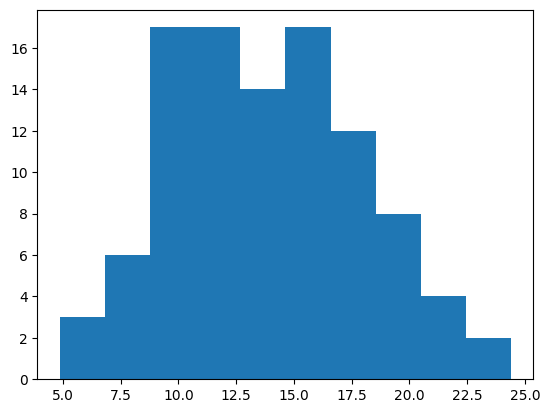

In [26]:
plt.hist(y)


We want to create a partial dependence plot, showing how each x value influences the answer.

We first work with one target variable at a time,  and create a list of "decile" values of num_steps in the range 0 to 1

the features list specifies we want the partial dependence of y on x[target], so we can look at each feature as desired

The cell below sets up the list of feature names, the target, the number of steps and the decile

In [27]:
target=0

num_steps=20

features=[(target,)]
feature_names = [f"Features #{i}" for i in range(X.shape[1])]
deciles = {0: np.linspace(0, 1, num=num_steps)}




Now compute the partial dependence of the output (y) on the desired preditor variable X[target]

This is done by running the model for each input X vector, but replacing the X[target] value by the range of values in decile, and then averaging over them.

Note that in the partial_dependence() calculation, we could specify "average", "individual" or "both"

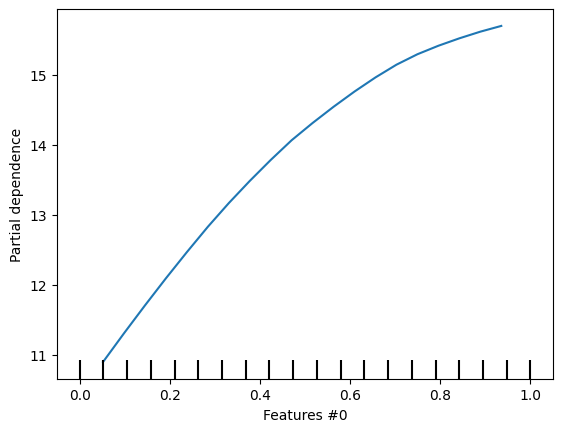

In [28]:
pd_results = partial_dependence(
    clf, X, features=target, kind="average", grid_resolution=num_steps)
display = PartialDependenceDisplay(
    [pd_results], features=features, feature_names=feature_names,
    target_idx=0, deciles=deciles
)
display.plot()
plt.show()

# Change the target number a bit, and see which variables seem to have substantial effects on the model

Discuss your results here

Features follows the there shape in the model above
- also the range in  partial denpendences was small for not important features and high for important features

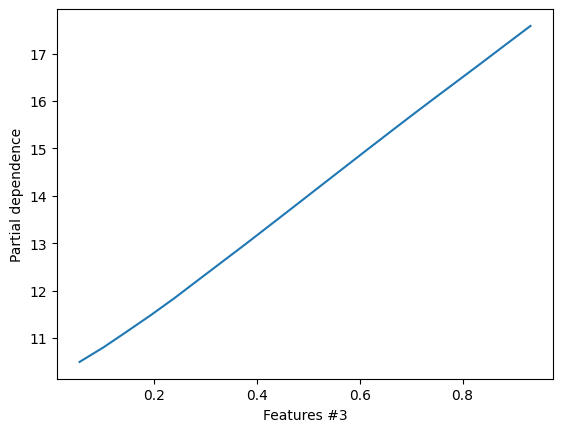

In [29]:
target=3

num_steps=20

features=[(target,)]
feature_names = [f"Features #{i}" for i in range(X.shape[1])]
deciles = {0: np.linspace(0, 1, num=num_steps)}

pd_results = partial_dependence(
    clf, X, features=target, kind="average", grid_resolution=num_steps)
display = PartialDependenceDisplay(
    [pd_results], features=features, feature_names=feature_names,
    target_idx=0, deciles=deciles
)
display.plot()
plt.show()

We should be able to use ELI5 to see which variables are most important

In [ ]:
!pip install eli5

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

In [ ]:
perm = PermutationImportance(clf, random_state=1).fit(X, y)

In [ ]:
eli5.show_weights(perm, feature_names = feature_names)

Weight,Feature
0.7044 ± 0.1405,Features #3
0.7035 ± 0.1424,Features #1
0.4459 ± 0.0728,Features #0
0.4155 ± 0.0439,Features #4
0.1558 ± 0.0464,Features #2
0.1198 ± 0.0259,Features #9
0.0854 ± 0.0393,Features #7
0.0846 ± 0.0325,Features #5
0.0704 ± 0.0252,Features #8
0.0657 ± 0.0307,Features #6


# Looking at the interaction of two predictor variables

We can plot a false color map that shows for two different predictors (one along the x-axis and one along the y-axis) what the predicted y value will be,  plotted as a false color "height" or contour

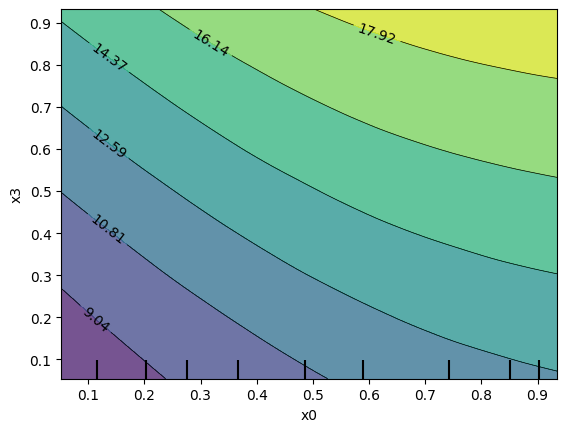

In [ ]:

PartialDependenceDisplay.from_estimator(clf, X, [(0, 3)])
plt.show()

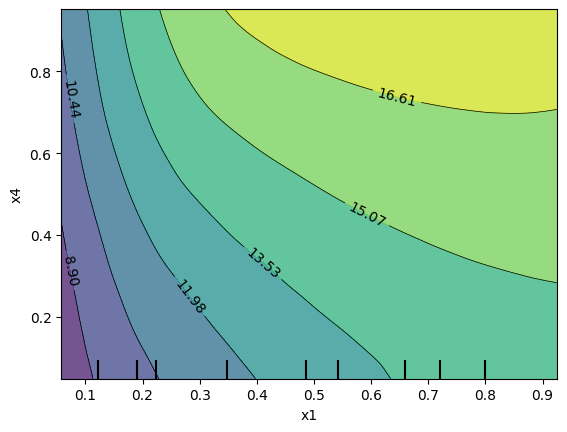

In [ ]:
PartialDependenceDisplay.from_estimator(clf, X, [(1, 4)])
plt.show()

In [ ]:
X.shape

(100, 10)

In [ ]:
feature_names

['Features #0',
 'Features #1',
 'Features #2',
 'Features #3',
 'Features #4',
 'Features #5',
 'Features #6',
 'Features #7',
 'Features #8',
 'Features #9']